# **FA Data Analysis**

This dataset contains person's information like age ,sex , blood pressure, smoke, diabetes,ejection fraction, creatinine phosphokinase, serum_creatinine,  serum_sodium, time and we have to predict their DEATH EVENT

In [1]:
import numpy as np
import pandas as pd

# **Import Libraries**

In [2]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
import xgboost
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

%matplotlib inline

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# **Lets Explore the data**

In [3]:
heart_data = pd.read_csv('fa_dataset.csv')
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


* Sex - Gender of patient Male = 1, Female =0
* Age - Age of patient
* Diabetes - 0 = No, 1 = Yes
* Anaemia - 0 = No, 1 = Yes
* High_blood_pressure - 0 = No, 1 = Yes
* Smoking - 0 = No, 1 = Yes
* DEATH_EVENT - 0 = No, 1 = Yes

# Is Age and Sex an indicator for Death Event?

In [4]:
# age distribution

hist_data =[heart_data["age"].values]
group_labels = ['age'] 

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title_text='Age Distribution plot')

fig.show()

* Age betweem 40 to 80 the spread is High
* Age that is less than 40 age and higher than 80 age are very low

In [5]:
fig = px.box(heart_data, x='sex', y='age', points="all")
fig.update_layout(
    title_text="Gender wise Age Spread - Male = 1 Female =0")
fig.show()

In [6]:
male = heart_data[heart_data["sex"]==1]
female = heart_data[heart_data["sex"]==0]

male_survi = male[heart_data["DEATH_EVENT"]==0]
male_not = male[heart_data["DEATH_EVENT"]==1]
female_survi = female[heart_data["DEATH_EVENT"]==0]
female_not = female[heart_data["DEATH_EVENT"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[heart_data["DEATH_EVENT"]==0]),len(male[heart_data["DEATH_EVENT"]==1]),
         len(female[heart_data["DEATH_EVENT"]==0]),len(female[heart_data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Gender")
fig.show()

# **Data Modeling**

**Train Test Split**

In [7]:
Features = ['time','ejection_fraction','serum_creatinine','age']
x = heart_data[Features]
y = heart_data["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2698)

**Random Forest Classifier**

In [8]:
# RandomForestClassifier

clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
clf.fit(x_train, y_train)
pred=clf.predict(x_test)

In [9]:
print(Fore.GREEN + "Accuracy of RandomForestClassifier is : ",clf.score(x_test,y_test))

Accuracy of RandomForestClassifier is :  0.9333333333333333


<Figure size 432x288 with 0 Axes>

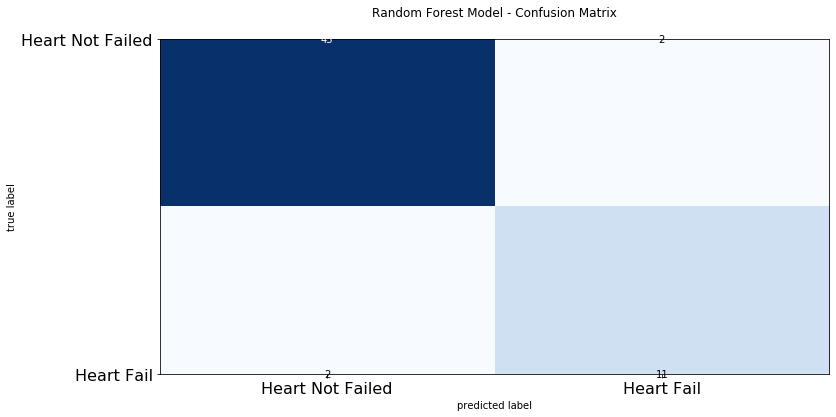

In [10]:
cm = confusion_matrix(y_test, pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

**Gradient Boosting Classifier**

In [11]:
# GradientBoostingClassifier

gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=4)
gradientboost_clf.fit(x_train,y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)

In [12]:
print(Fore.GREEN + "Accuracy of Gradient Boosting is : ",gradientboost_clf.score(x_test,y_test))

Accuracy of Gradient Boosting is :  0.95


<Figure size 432x288 with 0 Axes>

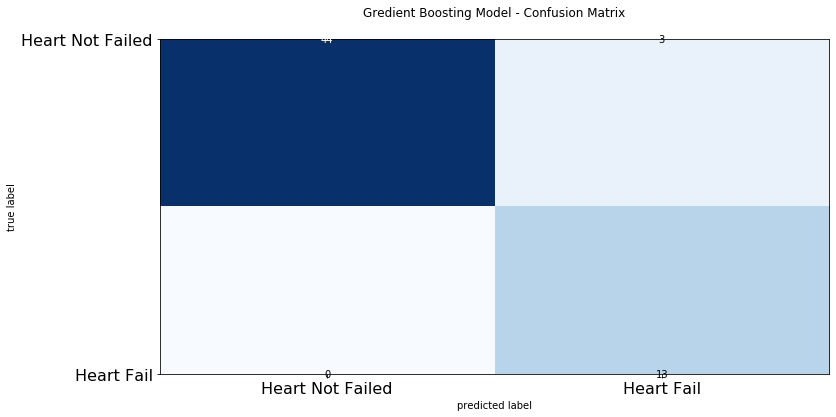

In [13]:
cm = confusion_matrix(y_test, gradientboost_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Gredient Boosting Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

* Random Forest Classifier: 96.67%
* Gradient Booster Classifier: 95.00%